<a href="https://colab.research.google.com/github/gopalkalpande/Caltech101/blob/master/Caltech101_Object_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/My Drive/data/caltech101/"

101_ObjectCategories  data.csv	X.joblib  X.npy  Y.npy


In [0]:
import pandas as pd

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
import shutil
import os
#source = os.listdir("/tmp/")
"""destination = "/content/drive/My Drive/data/caltech101/train"
for files in source:
    if files.endswith(".txt"):
        shutil.copy(files,destination)"""

In [0]:
import shutil, os

"""for f in X_train:
    shutil.copy(f, '/content/drive/My Drive/data/caltech101/train')"""

In [0]:
#!ls "/content/drive/My Drive/data/caltech101/train"

In [0]:
"""for f in X_test:
    shutil.copy(f, '/content/drive/My Drive/data/caltech101/test')"""

In [0]:
#!ls "/content/drive/My Drive/data/caltech101/test"

In [0]:
"""for f in X_valid:
    shutil.copy(f, '/content/drive/My Drive/data/caltech101/validation')"""

In [0]:
#!ls "/content/drive/My Drive/data/caltech101/validation"

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#le.fit(Y)

LabelEncoder()

In [0]:
"""Y_train= le.transform(Y_train)
Y_valid= le.transform(Y_valid)
Y_test= le.transform(Y_test)"""

In [24]:
from sklearn.externals import joblib
"""
joblib.dump(Y_test, '/content/drive/My Drive/data/caltech101/Y_test.joblib') 
joblib.dump(Y_train, '/content/drive/My Drive/data/caltech101/Y_train.joblib') 
joblib.dump(Y_valid, '/content/drive/My Drive/data/caltech101/Y_valid.joblib') """

['/content/drive/My Drive/data/caltech101/Y_valid.joblib']

In [25]:
!ls '/content/drive/My Drive/data/caltech101/'

101_ObjectCategories  test   validation  X.npy	Y_test.joblib	Y_valid.joblib
data.csv	      train  X.joblib	 Y.npy	Y_train.joblib


In [26]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# The GPU id to use, usually either "0" or "1"
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

import numpy as np
import cv2
from matplotlib import pyplot as plt

import keras
print("keras version: ", keras.__version__)

import tensorflow as tf
print("tensoflow version: ", tf.__version__)

keras version:  2.2.4
tensoflow version:  1.13.1


In [0]:
# istructions from: https://michaelblogscode.wordpress.com/2017/10/10/reducing-and-profiling-gpu-memory-usage-in-keras-with-tensorflow-backend/

# TensorFlow wizardry
config = tf.ConfigProto()
 
# Don't pre-allocate memory; allocate as-needed
config.gpu_options.allow_growth = True
 
# Only allow a total of half the GPU memory to be allocated
config.gpu_options.per_process_gpu_memory_fraction = 0.9
 
# Create a session with the above options specified.
keras.backend.tensorflow_backend.set_session(tf.Session(config=config))

In [32]:
dataset_path = '/content/drive/My Drive/data/caltech_101/101_ObjectCategories'
folder_names = []
folder_names = [f for f in sorted(os.listdir(dataset_path))]

print(len(folder_names)) # 102 = 101 categories + background

102


In [0]:
# directories to use. Run the other cells ONLY ONCE to create the splitting

base_path = '/content/drive/My Drive/data/caltech_101/101_ObjectCategories'
train_dir = os.path.join(base_path, 'train')
validation_dir = os.path.join(base_path, 'validation')
test_dir = os.path.join(base_path, 'test')

In [36]:
!ls '/content/drive/My Drive/data/caltech_101/'

101_ObjectCategories


In [40]:
category_dict = {}
images_per_category_dict = {}
category_images_path_dict = {}

total_images = 0

for i, category in enumerate(folder_names):
    category_dict[i] = category
    
    folder_path = dataset_path + '/' + category
    #image_names = [os.path.join(folder_path, img) for img in sorted(os.listdir(folder_path))]
    image_names = [img for img in sorted(os.listdir(folder_path))]
    
    images_per_category_dict[i] = len(image_names)
    category_images_path_dict[i] = image_names
    
    print('%s: %d' %(category, images_per_category_dict[i]))
    total_images += images_per_category_dict[i]
    
print('Total images in dataset: %d' %(total_images))

BACKGROUND_Google: 468
Faces: 435
Faces_easy: 435
Leopards: 200
Motorbikes: 798
accordion: 55
airplanes: 800
anchor: 42
ant: 42
barrel: 47
bass: 54
beaver: 46
binocular: 33
bonsai: 128
brain: 98
brontosaurus: 43
buddha: 85
butterfly: 91
camera: 50
cannon: 43
car_side: 123
ceiling_fan: 47
cellphone: 59
chair: 62
chandelier: 107
cougar_body: 47
cougar_face: 69
crab: 73
crayfish: 70
crocodile: 50
crocodile_head: 51
cup: 57
dalmatian: 67
dollar_bill: 52
dolphin: 65
dragonfly: 68
electric_guitar: 75
elephant: 64
emu: 53
euphonium: 64
ewer: 85
ferry: 67
flamingo: 67
flamingo_head: 45
garfield: 34
gerenuk: 34
gramophone: 51
grand_piano: 99
hawksbill: 100
headphone: 42
hedgehog: 54
helicopter: 88
ibis: 80
inline_skate: 31
joshua_tree: 64
kangaroo: 86
ketch: 114
lamp: 61
laptop: 81
llama: 78
lobster: 41
lotus: 66
mandolin: 43
mayfly: 40
menorah: 87
metronome: 32
minaret: 76
nautilus: 55
octopus: 35
okapi: 39
pagoda: 47
panda: 38
pigeon: 45
pizza: 53
platypus: 34
pyramid: 57
revolver: 82
rhino: 

In [0]:
# create the directories to use
base_path = '/content/drive/My Drive/data/caltech_101/data'
os.mkdir(base_path)

train_dir = os.path.join(base_path, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_path, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_path, 'test')
os.mkdir(test_dir)

In [0]:
# create the categories files in each

for directory in [train_dir, validation_dir, test_dir]:
    for category in folder_names:
        os.mkdir(os.path.join(directory, category))

In [0]:
# calculate the number of images to place in each train/valid/test categories folder

total_train = 0
total_validation = 0
total_test = 0

total_train_2 = 0
total_validation_2 = 0
total_test_2 = 0

for i, category in enumerate(folder_names):
    train_number = int(0.7 * images_per_category_dict[i])
    validation_number = int(0.2 * images_per_category_dict[i])
    test_number = images_per_category_dict[i] - train_number - validation_number # for not exceeding maximum number
    
    # for statistics later
    total_train += train_number
    total_validation += validation_number
    total_test += test_number
    
    # now copy these images to respective folders
    # Copy first 1000 cat images to train_cats_dir
    fnames = category_images_path_dict[i][:train_number]
    for fname in fnames:
        src = os.path.join(dataset_path, category, fname)
        dst = os.path.join(train_dir, category, fname)
        shutil.copyfile(src, dst)
        
    total_train_2 += len(fnames)
        
    fnames = category_images_path_dict[i][train_number:train_number + validation_number]
    for fname in fnames:
        src = os.path.join(dataset_path, category, fname)
        dst = os.path.join(validation_dir, category, fname)
        shutil.copyfile(src, dst)
        
    total_validation_2 += len(fnames)
    
    fnames = category_images_path_dict[i][train_number + validation_number:]
    for fname in fnames:
        src = os.path.join(dataset_path, category, fname)
        dst = os.path.join(test_dir, category, fname)
        shutil.copyfile(src, dst)
        
    total_test_2 += len(fnames)

In [42]:
# print statistics

print('Correct train split: ', total_train == total_train_2)
print('Correct validation split: ', total_validation == total_validation_2)
print('Correct test split: ', total_test == total_test_2)
print()
print('Number of training images: ', total_train)
print('Number of validation images: ', total_validation)
print('Number of test images: ', total_test)
print()
print('Real percentage of training images: ', total_train / total_images)
print('Real percentage of validation images: ', total_validation / total_images)
print('Real percentage of test images: ', total_test / total_images)

Correct train split:  True
Correct validation split:  True
Correct test split:  True

Number of training images:  6353
Number of validation images:  1788
Number of test images:  1004

Real percentage of training images:  0.6946965554948059
Real percentage of validation images:  0.19551667577911427
Real percentage of test images:  0.10978676872607983


In [54]:
!ls "/content/drive/My Drive/data/caltech_101/data/train"

accordion	   cougar_body	    garfield	  menorah     snoopy
airplanes	   cougar_face	    gerenuk	  metronome   soccer_ball
anchor		   crab		    gramophone	  minaret     stapler
ant		   crayfish	    grand_piano   Motorbikes  starfish
BACKGROUND_Google  crocodile	    hawksbill	  nautilus    stegosaurus
barrel		   crocodile_head   headphone	  octopus     stop_sign
bass		   cup		    hedgehog	  okapi       strawberry
beaver		   dalmatian	    helicopter	  pagoda      sunflower
binocular	   dollar_bill	    ibis	  panda       tick
bonsai		   dolphin	    inline_skate  pigeon      trilobite
brain		   dragonfly	    joshua_tree   pizza       umbrella
brontosaurus	   electric_guitar  kangaroo	  platypus    watch
buddha		   elephant	    ketch	  pyramid     water_lilly
butterfly	   emu		    lamp	  revolver    wheelchair
camera		   euphonium	    laptop	  rhino       wild_cat
cannon		   ewer		    Leopards	  rooster     windsor_chair
car_side	   Faces	    llama	  saxophone   wrench
ceiling_fan	   Faces_e

In [0]:
Y_train = []
path = "/content/drive/My Drive/data/caltech_101/data/train"
for label in os.listdir(os.path.join(path)):
    back_path = os.path.join(path,label)
    for filename in os.listdir(back_path):
        Y_train.append(label)

In [58]:
len(Y_train)

6353

In [0]:
Y_test = []
path = "/content/drive/My Drive/data/caltech_101/data/test"
for label in os.listdir(os.path.join(path)):
    back_path = os.path.join(path,label)
    for filename in os.listdir(back_path):
        Y_test.append(label)

In [62]:
len(Y_test)

1004

In [0]:
Y_valid = []
path = "/content/drive/My Drive/data/caltech_101/data/validation"
for label in os.listdir(os.path.join(path)):
    back_path = os.path.join(path,label)
    for filename in os.listdir(back_path):
        Y_valid.append(label)

In [63]:
len(Y_valid)

1788

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y_train)
Y_train= le.transform(Y_train)
Y_valid= le.transform(Y_valid)
Y_test= le.transform(Y_test)

In [43]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')


Found 6353 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.


In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [0]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(102, activation='softmax'))

In [81]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 102)               26214     
Total params: 16,838,310
Trainable params: 2,123,622
Non-trainable params: 14,714,688
_________________________________________________________________


In [82]:
len(model.trainable_weights)

4

In [0]:
conv_base.trainable = False

In [84]:
len(model.trainable_weights)

4

In [0]:
from keras import optimizers

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])


In [87]:

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)
#      verbose=2)

Epoch 1/30
100/100 [==============================] - 12s 123ms/step - loss: 1.2500 - acc: 0.6960 - val_loss: 1.0747 - val_acc: 0.7267
Epoch 2/30
100/100 [==============================] - 13s 129ms/step - loss: 1.0260 - acc: 0.7412 - val_loss: 0.9611 - val_acc: 0.7530
Epoch 3/30
100/100 [==============================] - 12s 125ms/step - loss: 0.3968 - acc: 0.9015 - val_loss: 0.8616 - val_acc: 0.7824
Epoch 4/30
100/100 [==============================] - 12s 117ms/step - loss: 0.3857 - acc: 0.8950 - val_loss: 0.8023 - val_acc: 0.7780
Epoch 5/30
100/100 [==============================] - 12s 115ms/step - loss: 0.4335 - acc: 0.8775 - val_loss: 0.8773 - val_acc: 0.7723
Epoch 6/30
100/100 [==============================] - 11s 114ms/step - loss: 0.1889 - acc: 0.9540 - val_loss: 0.7435 - val_acc: 0.8097
Epoch 7/30
100/100 [==============================] - 12s 121ms/step - loss: 0.1422 - acc: 0.9660 - val_loss: 0.8239 - val_acc: 0.7970
Epoch 8/30
100/100 [==============================] - 1

In [0]:
model.save("/content/drive/My Drive/data/caltech_101/caltech_1.h5")

In [89]:
!ls "/content/drive/My Drive/data/caltech_101/"

101_ObjectCategories  caltech_1.h5  data


In [90]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')


Found 1003 images belonging to 102 classes.


In [94]:

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.7580000019073486


In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [96]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)
#      verbose=2)

Epoch 1/100
100/100 [==============================] - 14s 139ms/step - loss: 15.1843 - acc: 0.0575 - val_loss: 15.2800 - val_acc: 0.0520
Epoch 2/100
100/100 [==============================] - 12s 118ms/step - loss: 15.3444 - acc: 0.0480 - val_loss: 15.3350 - val_acc: 0.0486
Epoch 3/100
100/100 [==============================] - 12s 124ms/step - loss: 15.2880 - acc: 0.0515 - val_loss: 15.2861 - val_acc: 0.0516
Epoch 4/100
100/100 [==============================] - 13s 125ms/step - loss: 15.1950 - acc: 0.0573 - val_loss: 15.2155 - val_acc: 0.0560
Epoch 5/100
100/100 [==============================] - 12s 120ms/step - loss: 15.2719 - acc: 0.0525 - val_loss: 15.2045 - val_acc: 0.0567
Epoch 6/100
100/100 [==============================] - 12s 118ms/step - loss: 15.3847 - acc: 0.0455 - val_loss: 15.2961 - val_acc: 0.0510
Epoch 7/100
100/100 [==============================] - 12s 118ms/step - loss: 15.2074 - acc: 0.0565 - val_loss: 15.4329 - val_acc: 0.0425
Epoch 8/100
100/100 [=============

In [0]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
#model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(102, activation='softmax'))

In [98]:
len(model.trainable_weights)

30

In [0]:
conv_base.trainable = False

In [100]:
len(model.trainable_weights)

4

In [101]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
30/30 [==============================] - 7s 232ms/step - loss: 4.0490 - acc: 0.1900 - val_loss: 3.6014 - val_acc: 0.2750
Epoch 2/100
30/30 [==============================] - 6s 193ms/step - loss: 3.3529 - acc: 0.3000 - val_loss: 2.9101 - val_acc: 0.3543
Epoch 3/100
30/30 [==============================] - 6s 199ms/step - loss: 2.6390 - acc: 0.4383 - val_loss: 2.5853 - val_acc: 0.4350
Epoch 4/100
30/30 [==============================] - 6s 197ms/step - loss: 2.4753 - acc: 0.4700 - val_loss: 2.2167 - val_acc: 0.5243
Epoch 5/100
30/30 [==============================] - 6s 198ms/step - loss: 2.1259 - acc: 0.5200 - val_loss: 2.0855 - val_acc: 0.5300
Epoch 6/100
30/30 [==============================] - 6s 194ms/step - loss: 2.1102 - acc: 0.5350 - val_loss: 1.9335 - val_acc: 0.5526
Epoch 7/100
30/30 [==============================] - 6s 213ms/step - loss: 1.7894 - acc: 0.5900 - val_loss: 1.7187 - val_acc: 0.5910
Epoch 8/100
30/30 [==============================] - 7s 220ms/step - 

In [102]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.7904374376924695


In [0]:
model.save("/content/drive/My Drive/data/caltech_101/caltech_2.h5")

In [0]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(102, activation='softmax'))

In [119]:
conv_base.trainable

True

In [111]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 102)               26214     
Total params: 15,134,886
Trainable params: 15,134,886
Non-trainable params: 0
_________________________________________________________________


In [116]:
for layer in conv_base.layers:
    print(layer.name)
    

input_7
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [0]:
conv_base.trainable = False

In [121]:
for layer in conv_base.layers:
    print(layer.name, layer.trainable)
    

input_7 False
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [126]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/50
100/100 [==============================] - 16s 161ms/step - loss: 0.7362 - acc: 0.7884 - val_loss: 2.3332 - val_acc: 0.5710
Epoch 2/50
100/100 [==============================] - 14s 143ms/step - loss: 0.5407 - acc: 0.8515 - val_loss: 2.7689 - val_acc: 0.5526
Epoch 3/50
100/100 [==============================] - 14s 144ms/step - loss: 0.6995 - acc: 0.8075 - val_loss: 2.3290 - val_acc: 0.5910
Epoch 4/50
100/100 [==============================] - 14s 145ms/step - loss: 0.6717 - acc: 0.8105 - val_loss: 2.1428 - val_acc: 0.5921
Epoch 5/50
100/100 [==============================] - 14s 140ms/step - loss: 0.4943 - acc: 0.8587 - val_loss: 2.5711 - val_acc: 0.5810
Epoch 6/50
100/100 [==============================] - 14s 138ms/step - loss: 0.5551 - acc: 0.8450 - val_loss: 2.5016 - val_acc: 0.5749
Epoch 7/50
100/100 [==============================] - 14s 140ms/step - loss: 0.5386 - acc: 0.8470 - val_loss: 2.5775 - val_acc: 0.6060
Epoch 8/50
100/100 [==============================] - 1

In [0]:
model.save("/content/drive/My Drive/data/caltech_101/caltech_3.h5")


In [128]:
!ls '/content/drive/My Drive/data/caltech_101/'

101_ObjectCategories  caltech_1.h5  caltech_2.h5  caltech_3.h5	data


In [129]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.580874872868568


In [0]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(102, activation='softmax'))

In [0]:
conv_base.trainable = False

In [132]:
%%time
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 13s 127ms/step - loss: 3.4454 - acc: 0.2900 - val_loss: 2.7094 - val_acc: 0.3978
Epoch 2/100
100/100 [==============================] - 11s 114ms/step - loss: 2.1993 - acc: 0.4984 - val_loss: 1.8665 - val_acc: 0.5688
Epoch 3/100
100/100 [==============================] - 12s 115ms/step - loss: 1.6250 - acc: 0.5965 - val_loss: 1.5164 - val_acc: 0.6200
Epoch 4/100
100/100 [==============================] - 12s 123ms/step - loss: 1.3026 - acc: 0.6690 - val_loss: 1.3433 - val_acc: 0.6366
Epoch 5/100
100/100 [==============================] - 13s 126ms/step - loss: 1.1438 - acc: 0.6992 - val_loss: 1.1271 - val_acc: 0.7080
Epoch 6/100
100/100 [==============================] - 12s 116ms/step - loss: 0.9341 - acc: 0.7460 - val_loss: 1.1516 - val_acc: 0.6984
Epoch 7/100
100/100 [==============================] - 11s 114ms/step - loss: 0.9102 - acc: 0.7495 - val_loss: 1.0506 - val_acc: 0.7190
Epoch 8/100
100/100 [===========================

In [0]:
model.save("/content/drive/My Drive/data/caltech_101/caltech_3.h5")


In [134]:

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.7263479150930232


In [0]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))



In [145]:
# Freeze the layers except the last 4 layers
for layer in conv_base.layers[:-4]:
    layer.trainable = False
 
#Check the trainable status of the individual layers
for layer in conv_base.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f7ca1f536a0> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca1f53198> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca1e2a940> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7ca1f4cb38> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca1f61f98> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca1df5470> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7ca27a3cc0> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca1f710f0> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca1ea0780> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca1ee8ef0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7ca1ec5748> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca1ec5128> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca1e6c320> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca1f23a20> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7ca1f2f160>

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(102, activation='softmax'))

In [147]:
%%time
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=70,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/70
100/100 [==============================] - 14s 141ms/step - loss: 3.8011 - acc: 0.1750 - val_loss: 3.2655 - val_acc: 0.2910
Epoch 2/70
100/100 [==============================] - 12s 121ms/step - loss: 2.9917 - acc: 0.3715 - val_loss: 2.9441 - val_acc: 0.3806
Epoch 3/70
100/100 [==============================] - 12s 121ms/step - loss: 2.9601 - acc: 0.3575 - val_loss: 2.6454 - val_acc: 0.3897
Epoch 4/70
100/100 [==============================] - 12s 120ms/step - loss: 2.5622 - acc: 0.4184 - val_loss: 2.5929 - val_acc: 0.4120
Epoch 5/70
100/100 [==============================] - 13s 128ms/step - loss: 2.3403 - acc: 0.4450 - val_loss: 2.4619 - val_acc: 0.4453
Epoch 6/70
100/100 [==============================] - 12s 120ms/step - loss: 2.1671 - acc: 0.4770 - val_loss: 2.1796 - val_acc: 0.4690
Epoch 7/70
100/100 [==============================] - 12s 119ms/step - loss: 2.0121 - acc: 0.5002 - val_loss: 1.8609 - val_acc: 0.5435
Epoch 8/70
100/100 [==============================] - 1

In [0]:
model.save("/content/drive/My Drive/data/caltech_101/caltech_4.h5")


In [149]:

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.7253306244906428


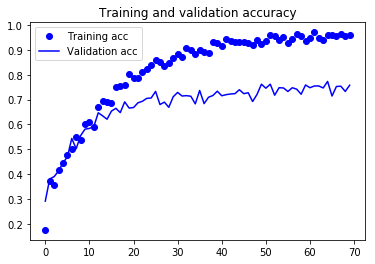

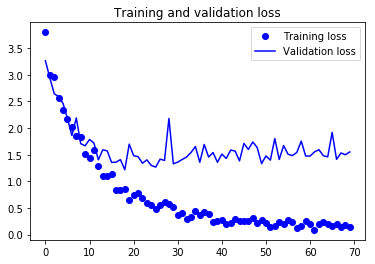

In [150]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# The first model where I got 79% accuracy; lets try data augumentation in it:

In [0]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))


In [0]:
conv_base.trainable = False

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(102, activation='softmax'))


In [154]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 6353 images belonging to 102 classes.


In [155]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)


Epoch 1/100
100/100 [==============================] - 21s 208ms/step - loss: 3.6176 - acc: 0.2520 - val_loss: 2.8000 - val_acc: 0.3610
Epoch 2/100
100/100 [==============================] - 19s 189ms/step - loss: 2.6610 - acc: 0.4130 - val_loss: 2.0806 - val_acc: 0.5081
Epoch 3/100
100/100 [==============================] - 19s 191ms/step - loss: 2.2369 - acc: 0.4815 - val_loss: 1.7277 - val_acc: 0.6022
Epoch 4/100
100/100 [==============================] - 20s 201ms/step - loss: 1.8611 - acc: 0.5581 - val_loss: 1.5222 - val_acc: 0.6200
Epoch 5/100
100/100 [==============================] - 19s 190ms/step - loss: 1.6555 - acc: 0.5850 - val_loss: 1.4381 - val_acc: 0.6326
Epoch 6/100
100/100 [==============================] - 19s 189ms/step - loss: 1.5948 - acc: 0.6025 - val_loss: 1.3217 - val_acc: 0.6590
Epoch 7/100
100/100 [==============================] - 19s 189ms/step - loss: 1.4319 - acc: 0.6506 - val_loss: 1.1881 - val_acc: 0.6953
Epoch 8/100
100/100 [===========================

In [0]:

model.save("/content/drive/My Drive/data/caltech_101/caltech_5.h5")

In [157]:

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)


test acc: 0.7934893192012822


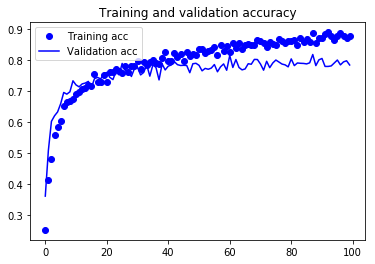

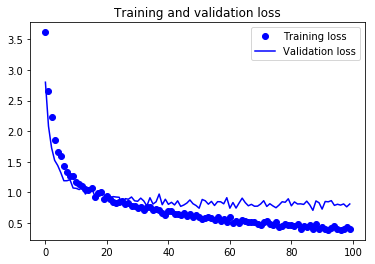

In [158]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))


In [160]:
# Freeze the layers except the last 4 layers
for layer in conv_base.layers[:-4]:
    layer.trainable = False
 
#Check the trainable status of the individual layers
for layer in conv_base.layers:
    print(layer, layer.trainable)


<keras.engine.input_layer.InputLayer object at 0x7f7ca4768780> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca4768898> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca2b86668> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7ca1fb6e80> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca1fb6208> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca4709b70> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7ca4722e48> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca4722be0> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca4669908> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca46636d8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7ca47748d0> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca472c908> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca464d240> False
<keras.layers.convolutional.Conv2D object at 0x7f7ca0cb8e48> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7ca0ce4588>

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(102, activation='softmax'))


In [162]:
%%time
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=80,
      validation_data=validation_generator,
      validation_steps=50)


Epoch 1/80
100/100 [==============================] - 23s 228ms/step - loss: 4.0923 - acc: 0.1300 - val_loss: 3.4482 - val_acc: 0.2399
Epoch 2/80
100/100 [==============================] - 20s 198ms/step - loss: 3.4174 - acc: 0.2683 - val_loss: 3.2415 - val_acc: 0.3077
Epoch 3/80
100/100 [==============================] - 21s 211ms/step - loss: 3.0877 - acc: 0.3350 - val_loss: 2.8291 - val_acc: 0.3640
Epoch 4/80
100/100 [==============================] - 20s 197ms/step - loss: 2.9484 - acc: 0.3405 - val_loss: 2.6010 - val_acc: 0.3816
Epoch 5/80
100/100 [==============================] - 20s 196ms/step - loss: 2.7705 - acc: 0.3661 - val_loss: 2.7249 - val_acc: 0.3860
Epoch 6/80
100/100 [==============================] - 20s 200ms/step - loss: 2.7055 - acc: 0.3690 - val_loss: 2.6207 - val_acc: 0.3785
Epoch 7/80
100/100 [==============================] - 22s 220ms/step - loss: 2.4362 - acc: 0.4245 - val_loss: 2.3074 - val_acc: 0.4360
Epoch 8/80
100/100 [==============================] - 2

In [0]:
model.save("/content/drive/My Drive/data/caltech_101/caltech_6.h5")


In [164]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)


test acc: 0.7039674448336372


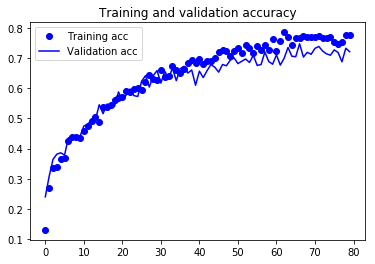

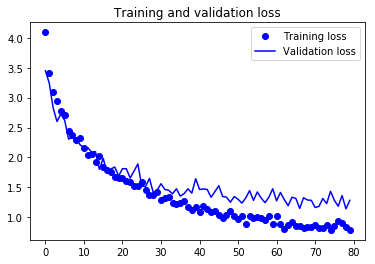

In [165]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()